# plot zscore against normal price

In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import figure

In [25]:
# Read market data 1
market_data1 = pd.read_csv("midpoint_log1.txt")

market_data1.columns = ['Instrument', 'Price']

# Split dataframe into seperate instruments
instrument0_midpoint_price = market_data1[market_data1['Instrument'] == 0]
instrument1_midpoint_price = market_data1[market_data1['Instrument'] == 1] 

instrument0_midpoint_price = instrument0_midpoint_price.reset_index()
instrument0_midpoint_price = instrument0_midpoint_price['Price'][:-1]

instrument1_midpoint_price = instrument1_midpoint_price.reset_index()
instrument1_midpoint_price = instrument1_midpoint_price['Price']

Future_Price = instrument0_midpoint_price[:100]
ETF_Price = instrument1_midpoint_price[:100]

Text(0, 0.5, 'Price')

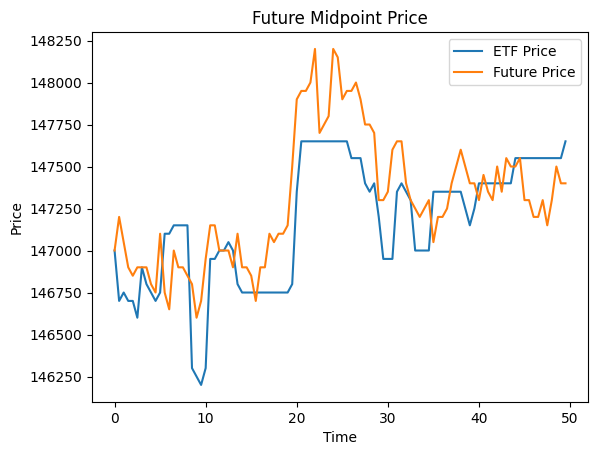

In [26]:
x = np.arange(0, Future_Price.size/2, 0.5)
x = np.arange(0, ETF_Price.size/2, 0.5)
plt.plot(x, ETF_Price, label="ETF Price")
plt.plot(x, Future_Price, label="Future Price")
plt.legend()
plt.title("Future Midpoint Price")
plt.xlabel("Time")
plt.ylabel("Price")

In [27]:
from matplotlib.pyplot import figure
ratio = Future_Price / ETF_Price
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20

figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

TypeError: 'module' object is not callable